## Introduction To Machine Learning | Task 3 : Protein Classification task 

In [1]:
import numpy as np 
import torch 
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
import matplotlib.pyplot as plt
import keras

### Import training, test set and a submission sample

In [2]:
submission_sample = pd.read_csv('sample.csv')
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

### Split the training set into labels and training inputs

In [3]:
print('Our training set contains', training_set.columns[0], 'and a flag marking the protein',training_set.columns[1],'or not ')
print('We have, in total,', training_set.shape[0],'training data')
x_train = training_set['Sequence']
y_train = training_set['Active']
print('We don t have repeating sequences, since the length of unique sequences is',pd.unique(x_train).shape[0])

Our training set contains Sequence and a flag marking the protein Active or not 
We have, in total, 112000 training data
We don t have repeating sequences, since the length of unique sequences is 112000


##### The input to our classification task are sequence of letters, therefore we will have to figure out : 
* What is the way to represent them as meaningful numbers 
* Does order matter ? LSTM ? 

##### First of all lets undedrstand how many different aminoacids are there and their frequence

In [4]:
#This function is used to split a sequence of letters into single letters
def split(word):
    return [char for char in word]

print('Example: ',x_train[0],'--->',split(x_train[0]))

Example:  DKWL ---> ['D', 'K', 'W', 'L']


In [5]:
single_letters = pd.DataFrame([split(code) for code in split(x_train)])
#Collect the different letters found in any sequence, that is the different aminoacids
aminoacids = [letters for letters in pd.unique(single_letters[0])]
print(aminoacids)

['D', 'F', 'K', 'N', 'I', 'G', 'V', 'R', 'E', 'Q', 'L', 'M', 'A', 'Y', 'H', 'P', 'T', 'S', 'W', 'C']


In [6]:
#We want to count how often each aminoacid is there
count = []
for aminoacid in aminoacids: 
    count.append(sum(single_letters.to_numpy().flatten() == aminoacid))
    

In [7]:
aminoacids_frequency = np.array([aminoacids,count])

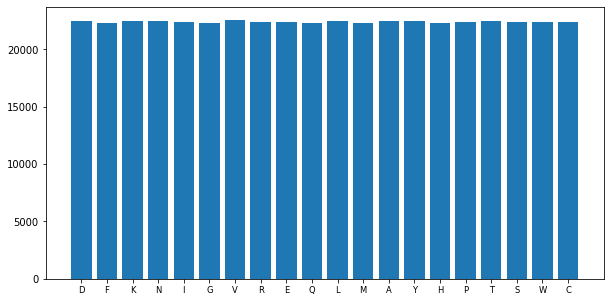

In [8]:
fig = plt.figure(figsize =(10,5))
plt.bar(range(len(count)), count, align='center')
plt.xticks(range(len(count)), aminoacids, size='small')
plt.show()

### Text Pre Processing
##### We create a dictionary containing all the different aminoacids that encode our mutations

In [9]:
codes = aminoacids
def create_dict(codes):
    char_dict = {}
    for index, val in enumerate(codes):
        char_dict[val] = index+1
    return char_dict

char_dict = create_dict(codes)

print(char_dict)
print("Dict Length:", len(char_dict))

{'D': 1, 'F': 2, 'K': 3, 'N': 4, 'I': 5, 'G': 6, 'V': 7, 'R': 8, 'E': 9, 'Q': 10, 'L': 11, 'M': 12, 'A': 13, 'Y': 14, 'H': 15, 'P': 16, 'T': 17, 'S': 18, 'W': 19, 'C': 20}
Dict Length: 20


#### Then we encode our data with the ffollowing function, which for each protein, returns the sequence of aminoacidds according to our dictionary 

In [10]:
def integer_encoding(data):
    """
  - Encodes code sequence to integer values.
  - 20 common amino acids are taken into consideration
    and rest 4 are categorized as 0.
    """
    encode_list = []
    for row in data['Sequence'].values:
        row_encode = []
        for code in row:
            row_encode.append(char_dict.get(code, 0))
        encode_list.append(np.array(row_encode))
    
    return encode_list
  
train_encoded = pd.DataFrame(integer_encoding(training_set))

### Thereafter we convert the codes to a onehot structure 
##### What this does is it simply transform each letter off each mutation sequence into one array of length 20 with a one in the column corresponding to the letter it encodes

In [11]:
from keras.utils import to_categorical

# One hot encoding of sequences
train_ohe = to_categorical(train_encoded)

print(train_ohe.shape)
print(y_train.shape[0])

(112000, 4, 21)
112000


#### We also have to transform our labels into a one hot encoding structure with the label being either zero or one

In [12]:
labels = []
for row in y_train:
    if row == 0 :
        labels.append([1,0])
    else :
        labels.append([0,1])
labels = np.array(labels)
assert len(labels) == train_ohe.shape[0]

### We perform the same preprocessing pipeline for our test set

In [13]:
print('---------------------------------------------------')
print('Our test set contains', test_set.columns[0])
print('We have, in total,', test_set.shape[0],'test data')

x_test = test_set['Sequence']

#This function is used to split a sequence of letters into single letters
def split(word):
    return [char for char in word]

print('\nWe first split each sequence in a list of letters\n')

print('Example: ',x_test[0],'--->',split(x_test[0]))

single_letters = pd.DataFrame([split(code) for code in split(x_test)])

#Collect the different letters found in any sequence, that is the different aminoacids
test_aminoacids = [letters for letters in pd.unique(single_letters[0])]

print('\n---------------------------------------------------')
print('\nIn the test set we have the followign Aminoacids ',test_aminoacids)
print('\nAre they equal to the trainin aminoacids ?       ', aminoacids)
print('\nYes they are. Therefore we can use the same dictionary to one hot encode\n')
codes = test_aminoacids
def create_dict(codes):
    char_dict = {}
    for index, val in enumerate(codes):
        char_dict[val] = index+1
    return char_dict

char_dict = create_dict(codes)

print(char_dict)
print("\n Dict Length:", len(char_dict))

def integer_encoding(data):
    """
  - Encodes code sequence to integer values.
  - 20 common amino acids are taken into consideration
    and rest 4 are categorized as 0.
    """
    encode_list = []
    for row in data['Sequence'].values:
        row_encode = []
        for code in row:
            row_encode.append(char_dict.get(code, 0))
        encode_list.append(np.array(row_encode))
    
    return encode_list
print('\n---------------------------------------------------')

test_encoded = pd.DataFrame(integer_encoding(test_set))

print('Example of encoded test set \n\n', x_test[0:5],'.\n.\n.\n.\n.\n.\n\n',test_encoded[0:5])
print('\n---------------------------------------------------')
print('\nNow we convert to one hot encoding, which has shape:\n')

test_ohe = to_categorical(test_encoded)

print(test_ohe.shape)

---------------------------------------------------
Our test set contains Sequence
We have, in total, 48000 test data

We first split each sequence in a list of letters

Example:  HWFK ---> ['H', 'W', 'F', 'K']

---------------------------------------------------

In the test set we have the followign Aminoacids  ['H', 'M', 'A', 'N', 'L', 'T', 'E', 'G', 'I', 'R', 'P', 'C', 'W', 'F', 'D', 'V', 'S', 'Y', 'K', 'Q']

Are they equal to the trainin aminoacids ?        ['D', 'F', 'K', 'N', 'I', 'G', 'V', 'R', 'E', 'Q', 'L', 'M', 'A', 'Y', 'H', 'P', 'T', 'S', 'W', 'C']

Yes they are. Therefore we can use the same dictionary to one hot encode

{'H': 1, 'M': 2, 'A': 3, 'N': 4, 'L': 5, 'T': 6, 'E': 7, 'G': 8, 'I': 9, 'R': 10, 'P': 11, 'C': 12, 'W': 13, 'F': 14, 'D': 15, 'V': 16, 'S': 17, 'Y': 18, 'K': 19, 'Q': 20}

 Dict Length: 20

---------------------------------------------------
Example of encoded test set 

 0    HWFK
1    MWPW
2    ALDV
3    NTLG
4    LHYY
Name: Sequence, dtype: object .
.

## Simple Classifier Attempt

## LSTM Network Definition 

In [14]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation,Add,Input,Conv1D,MaxPooling1D,Dropout,Flatten,Dense
from keras.regularizers import l2
from keras.models import Model

In [15]:
def residual_block(data, filters, d_rate):
    """
    _data: input
    _filters: convolution filters
    _d_rate: dilation rate
    """

    shortcut = data

    bn1 = BatchNormalization()(data)
    act1 = Activation('relu')(bn1)
    conv1 = Conv1D(filters, 1, dilation_rate=d_rate, padding='same', kernel_regularizer=l2(0.001))(act1)

    #bottleneck convolution
    bn2 = BatchNormalization()(conv1)
    act2 = Activation('relu')(bn2)
    conv2 = Conv1D(filters, 3, padding='same', kernel_regularizer=l2(0.001))(act2)

    #skip connection
    x = Add()([conv2, shortcut])

    return x

In [16]:
# input
x_input = Input(shape=(4, 21))

#initial conv
conv = Conv1D(128, 1, padding='same')(x_input) 

# per-residue representation
res1 = residual_block(conv, 128, 2)
res2 = residual_block(res1, 128, 3)

x = MaxPooling1D(3)(res2)
x = Dropout(0.5)(x)

# softmax classifier
x = Flatten()(x)
x_output = Dense(2, activation='softmax', kernel_regularizer=l2(0.0001))(x)

model2 = Model(inputs=x_input, outputs=x_output)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
print(model2.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 21)]      0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4, 128)       2816        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4, 128)       512         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 4, 128)       0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [18]:
model2.fit(train_ohe,labels)

3500/3500 [==============================] - 20s 5ms/step - loss: 0.3962 - accuracy: 0.9681


In [19]:
probabilities = model2.predict(train_ohe)

In [20]:
predictions = np.argmax(probabilities,axis = 1)

In [21]:
training_accuracy = 1 - abs(sum(predictions - y_train)/len(y_train))
print(training_accuracy)
print(predictions[0],y_train[0])

0.9845357142857143
0 0


In [22]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for i in range(len(predictions)):
    prediction = predictions[i]
    truth = y_train[i]
    if prediction == 1 and truth == 1 :
        true_positive += 1
    if prediction == 1 and truth == 0 :
        false_positive += 1
    if prediction == 0 and truth == 1 :
        false_negative += 1
    if prediction == 0 and truth == 0 :
        true_negative += 1
print('True Positive = ',true_positive,'\nTrue Negative = ',true_negative,'\nFalse Positive = ',false_positive,'\nFalse Negative = ',false_negative)

True Positive =  2099 
True Negative =  107405 
False Positive =  382 
False Negative =  2114


In [23]:
from sklearn.metrics import f1_score
print('F1 score is (on the training set) :',f1_score(y_train, predictions))

F1 score is (on the training set) : 0.6271287720346579


## Compute predictions for the test set 

In [24]:
test_predictions = np.argmax(model2.predict(test_ohe),axis = 1) 

In [25]:
submission_sample

,1
0,0
1,0
2,1
3,0
4,0
...,...
47994,0
47995,1
47996,0
47997,1
